>Mobile Communications - FEUP - Network Simulation - WiFi

# Objectives of the Project
- To study the performance of wireless network (WiFi) scenarios 
using discrete event simulation techniques
- Using the network simulator [ns-3](https://www.nsnam.org/)

## Install and start using ns-3
- Install VMware or VirtualBox in your computer
- Install Ubuntu as a virtual machine and build ns-3 within Ubuntu 
- You may use 2 alternatives
1. Download and run the Ubuntu-COMO image available at the netlab (via moodle)
    - includes complied ns-3 software and examples
2. Do it by yourself
    - Download the latest version of Ubuntu and update it
        `sudo apt-get update ; sudo apt-get build-essential`
    - Install Python
    - Build ns-3 according to the ns-3 installation recommendations
    - Copy the provided examples (available in Moodle) to the scratch folder 
- Study the provided examples (one example for each study)
- Additionally, you may also study other ns-3 tutorials
- Look at the ns-3 modules related to our course: 
    - network, applications, wifi, propagation, mobility
- Start your study by using the provided examples

In [3]:
import subprocess
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import logging as lg

%cd /home/mobile/ns-allinone-3.35/ns-3.35

duration = 10

/home/mobile/ns-allinone-3.35/ns-3.35


## __First Study - Throughput vs Distance__ 

---
### 1 AP, 1 STA
---
- Assume that both the AP and the STA have full TCP/IP stacks
- It simplifies the simulation script
- Let the STA generate one TCP flow towards the AP
- Carry out simulations for different distances between the STA and the AP
- For each distance measure the average throughput obtained by the flow
-Throughput (in bit/s) is measured at the node that receiving the information 
- Use both flowmon and wireshark to characterize throughputs Flowmon enables you to obtain relevant statistics, including histograms Wireshark enables you to observe packets along the time, including the TCP congestion control mechanism in action
- Represent results as a  function of distance
First Study -Throughput vs distance
---
Notes:

- You may start at 100m. Lower `distances` result in about the same effective TCP throughput. 
- The maximum link `distance` is expected to be around 1450m. At 1500m there is no connectivity.
- You may collect results with steps of 100m between 100m and 1500m. Decrease the step size if more resolution is needed for the resulting plot($s$).

The default settings are:
> ```duration=10``` ($s$)
>
> ```distance=100``` ($m$)

You may change the parameters directly in the code and run the scenario without any argument:

```./waf --run "scratch/first_study"```

or feed the `distance` ($m$) between nodes and the `duraton` of the flow ($s$) you want to simulate via command line arguments:

```./waf --run "scratch/first_study --distance=100 --duration=60"```


In [20]:
def first_study(start=100,stop=1500,step=100,duration=1):
    

    print('--- First Study ---\n')

    # if(default): # 
    #     start = 100
    #     stop = 1500
    #     step = 100
    #     duration = 1
    #     distance = start
    # else:
    #     start = input('Limite Min?')
    #     stop = input('Limite Max?')
    #     step = input('Passo?')
    #     duration = input('Duracao?')
        

    regex = r"       Throughput: (\d+\.\d+) Kbps"

    rx = re.compile(regex)

    df = pd.DataFrame(columns=['Flow1','Flow2','Distance'],dtype= np.float64)

    for distance in range(start,stop,step):
        i = int (distance - start)/step 
        #print(f'Distance is {distance}m, iteration {i}, running command:\n    ./waf --run "scratch/first_study --distance={distance} --duration={duration}"')
        process = subprocess.run([f'./waf --run "scratch/first_study --distance={distance} --duration={duration}"'], shell=True, check=True, stdout=subprocess.PIPE, universal_newlines=True)
        output = rx.findall(process.stdout)
        df.loc[i] = output+[distance]
        #print(f'Throughput Results:\n    Flow 1 -> {output[0]} Kbps\n    Flow 2 -> {output[1]} Kbps\n\n')

    df[:] = df[:].astype(float)
    df.plot(x='Distance', kind='line', y=["Flow1","Flow2"], title='Throughput vs Distance')
    print(df)



--- First Study ---

          Flow1     Flow2  Distance
0.0   21250.600  481.7540     100.0
1.0   15350.600  346.4790     200.0
2.0   15504.100  350.0100     300.0
3.0   11629.600  261.1860     400.0
4.0    9744.890  217.9590     500.0
5.0    9871.940  220.8830     600.0
6.0    9776.050  218.7000     700.0
7.0    6620.850  146.4040     800.0
8.0    7067.070  156.5560     900.0
9.0    7033.980  155.8280    1000.0
10.0   3933.850   84.8536    1100.0
11.0   3710.940   79.5984    1200.0
12.0   3923.650   84.4722    1300.0
13.0    446.967   12.0282    1400.0


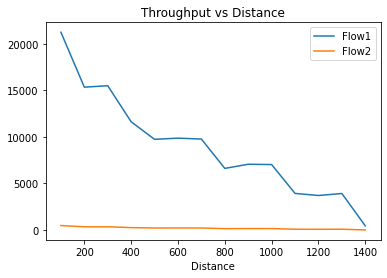

In [21]:
first_study(duration=duration)

## __Second Study - Throughput vs number of STAs__

---
### 1 AP, n STA
---

 Assume again that both the AP and the STAs have full TCP/IP stacks
- Each STA generates one TCP flow  towards the AP
- Carry out simulations for variable numbers of STA located around the AP
- same distance for all STA, circumference around AP
- For each number of STAs measure the throughput obtained by stations
- aggregated (sum of all stations) and average
- Represent results as a function of number of STAs
---
- The coded scenario starts each flow to the sink node between t=2.0s and t=4.0s of simulation time, to avoid collisions.
- Try to simulate using longer `durations` so that the TCP throughput of each flow has a chance of stabilizing.
- You may simulate, for example, up to 15 nodes. When increasing the number of senders, some TCP connection establishments may timeout, leaving some senders idle throughout the simulation.

The default settings are:
> ```duration=10``` ($s$)
>
> ```nr_of_senders=2``` ($nodes$)

You may change the parameters directly in the code and run the scenario without any argument:

```./waf --run "scratch/second_study"```

or feed the `duration` of each flow ($s$) and the `number` of sender nodes you want to simulate via command line arguments:

```./waf --run "scratch/second_study --duration=60  --nr_of_senders=10"```


In [22]:
def second_study(start=1,stop=15,step=1,duration=1):
    print('--- Second Study ---\n')

    # if(default): # 
    #     start = 1
    #     stop = 2
    #     step = 1
    #     duration = 1
    # else:
    #     start = input('Limite Min?')
    #     stop = input('Limite Max?')
    #     step = input('Passo?')
    #     duration = input('Duracao?')

    str = ['Nodes']
    for nodes in range(start,stop+step,step):
        i = int ((nodes- start)/step)
        str.append(f'Flow{i+1}')

    df = pd.DataFrame(columns=str,index=range(stop),dtype= np.float64)

    regex =r"Flow ID: . Src Addr 10\.0\.0\..* Dst Addr 10\.0\.0\.1\n       Tx Packets = .*\n       Rx Packets = .*\n       Throughput: (\d+\.\d+) Kbps"
    rx = re.compile(regex)

    for nodes in range(start,stop+step,step):
        i = int (nodes- start)/step 

        #print(f'Duration is {duration}m, nodes {nodes}, running command:\n    ./waf --run "scratch/second_study --duration={duration} --nr_of_senders={nodes}"')
        process = subprocess.run([f'./waf --run "scratch/second_study --duration={duration} --nr_of_senders={nodes}"'], shell=True, check=True, stdout=subprocess.PIPE, universal_newlines=True)
        output = rx.findall(process.stdout)
        output=[f'{int (nodes)}']+output
        while(len(output)<stop+1):
            output.append(np.nan)
        df.loc[i] = output  
        #print(f'Throughput Results:\n    Flow 1 -> {output[0]} Kbps\n    Flow 2 -> {output[1]} Kbps\n\n')


    df[str[1::]] = df[str[1::]].astype(float)

    dfstats = pd.DataFrame()
    dfstats.loc[:,'Nodes'] = df.loc[:,'Nodes']
    dfstats.loc[:,'Sum'] = df.sum(numeric_only=True, axis=1)
    dfstats.loc[:,'Mean'] = df.mean(numeric_only=True, axis=1)

    df.plot(x='Nodes', kind='bar', stacked=True,title='Flow Composition By Node')
    dfstats.plot(x='Nodes', kind='bar', stacked=False,title='Stats By Node')


    print('--- DATA ---')
    print(df)
    print(df.dtypes)
    print('--- STATS ---')
    print(dfstats)
    print(dfstats.dtypes)


--- Second Study ---

--- DATA ---
   Nodes     Flow1    Flow2    Flow3     Flow4        Flow5    Flow6  Flow7  \
0      1  21238.70      NaN      NaN       NaN          NaN      NaN    NaN   
1      2  13046.70  8655.87      NaN       NaN          NaN      NaN    NaN   
2      3   6892.28  7208.23  6384.43       NaN          NaN      NaN    NaN   
3      4   7166.46  4849.54  4976.40  4988.820          NaN      NaN    NaN   
4      5   5793.34  5106.15  2788.92  4318.050  3542.400000      NaN    NaN   
5      6   5754.54  2840.12  4802.16  3256.640          NaN      NaN    NaN   
6      7   4836.85  4871.25  2488.07  1301.520  1604.650000  3717.10    NaN   
7      8   4039.16  4038.77  2436.07  1976.570  2903.400000  1985.10    NaN   
8      9   4484.65  1840.29  2324.01  1899.050     0.147551  2983.32    NaN   
9     10   3546.14  3063.82  1732.28  1750.340  2829.670000  1626.65    NaN   
10    11   3840.33  2134.94  2967.75   767.752  2689.050000  1584.56    NaN   
11    12   3038.5

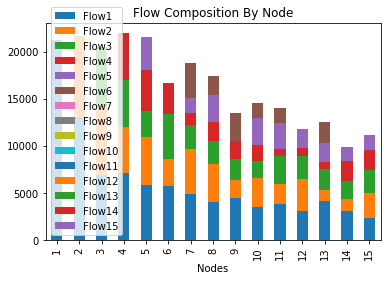

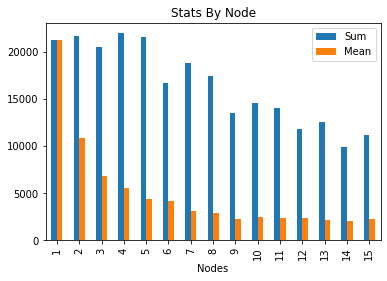

In [23]:
second_study(duration=duration)

## __Third Study - TCP Throughput vs UDP bitrate__

---
### 1 AP , 2 STA
---
- One STA generates one TCP flow towards the AP
- The other STA generates a Constant BitRate UDP flow towards the AP 
- two ports in AP, one for each STA
- Same distance for both STAs; the nodes can listen to each other
- Carry out simulations for different bitrates generated by the UDP STA
- Measure throughputs, delays and packet losses
- Represent results as functions of the bitrate generated by the UDP STA
---
- Start the UDP flow at 1Mbit/s and increase it by 1Mbit/s steps until the link capacity is clearly exceeded (i.e., the UDP throughput at the sink node will stabilize, independently of how much more traffic is offered at the sender because it is lost).
- When analysing the results, the node with ip=10.0.0.3 is the node sending the UDP flow.

The default settings are:
> `duration=10` ($s$)
>
> `udp_data_rate=1Mbps` 

You may change the parameters directly in the code and run the scenario without any argument:

```./waf --run "scratch/third_study"```

or feed the duration of the TCP and UDP flows ($s$) and the UDP data rate via command line arguments:

```./waf --run "scratch/third_study --duration=60  --udp_data_rate=1Mbps"```


In [5]:
def third_study(start=1,stop=15,step=1,duration=1):
    print('--- Third Study ---\n')

    # if(default): # 
    #     start = 1
    #     stop = 15
    #     step = 1
    #     duration = 1
    # else:
    #     start = input('Limite Min?')
    #     stop = input('Limite Max?')
    #     step = input('Passo?')
    #     duration = input('Duracao?')
        
    udpdr = start
    regex = r"       Throughput: (\d+.\d+) Kbps"
    rx = re.compile(regex)
    df = pd.DataFrame(columns=['Flow1','Flow2','Flow3','UDPDR'],dtype= np.float64)
    for udpdr in range(start,stop+step,step):
        i = int (udpdr- start)/step 
        print(f' # {int(i)} -_Duration is {duration}m, UDP Data Rates {udpdr}Mbps, running command:\n    ./waf --run "scratch/third_study --duration={duration} --udp_data_rate={udpdr}Mbps"')
        process = subprocess.run([f'./waf --run "scratch/third_study --duration={duration} --udp_data_rate={udpdr}Mbps"'], shell=True, check=True, stdout=subprocess.PIPE, universal_newlines=True)
        output = rx.findall(process.stdout)
        print(process.stdout)
        print(output)
        print(f'Throughput Results:\n    Flow 1 -> {output[0]} Kbps\n    Flow 2 -> {output[1]}  Flow 3 -> {output[2]} Kbps\n\n')
        df.loc[i] = output+[udpdr]
    
    df[:] = df[:].astype(float)
    df.plot(x='UDPDR', kind='line', y=["Flow1","Flow2","Flow3"], title='Throughput vs UDPDR')
    print(df)

--- Third Study ---

 # 0 -_Duration is 10m, UDP Data Rates 1Mbps, running command:
    ./waf --run "scratch/third_study --duration=10 --udp_data_rate=1Mbps"
Waf: Entering directory `/home/mobile/ns-allinone-3.35/ns-3.35/build'
Waf: Leaving directory `/home/mobile/ns-allinone-3.35/ns-3.35/build'
Build commands will be stored in build/compile_commands.json
'build' finished successfully (0.911s)
SimTime: 1
SimTime: 2
SimTime: 3
SimTime: 4
SimTime: 5
SimTime: 6
SimTime: 7
SimTime: 8
SimTime: 9
SimTime: 10
SimTime: 11
SimTime: 12
SimTime: 13
SimTime: 14
SimTime: 15
SimTime: 16
SimTime: 17
SimTime: 18
SimTime: 19

Flow ID: 1 Src Addr 10.0.0.2 Dst Addr 10.0.0.1
       Tx Packets = 22738
       Rx Packets = 22738
       Throughput: 20299.5 Kbps

Flow ID: 2 Src Addr 10.0.0.1 Dst Addr 10.0.0.2
       Tx Packets = 11369
       Rx Packets = 11369
       Throughput: 459.945 Kbps

Flow ID: 3 Src Addr 10.0.0.3 Dst Addr 10.0.0.1
       Tx Packets = 848
       Rx Packets = 848
       Throughput: 997.2

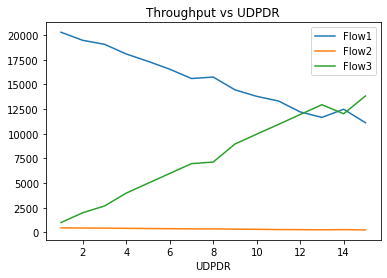

In [6]:
third_study(duration=duration)


## __Fourth Study – Throughput vs distance with relay__

---
### 1 AP, 1 RELAY, 1 STA, positioned in a line
---
- AP and the STA have full TCP/IP stacks
- STA generates one TCP flow towards the AP
    - The flow should be sent via the RELAY node
- Carry out simulations for different distances d, considering
    - `DistanceAP-STA= d |    DistanceAP-RELAY = DistanceRELAY-STA = d/2`
- For each distance measure the average throughput obtained by the flow
    - Throughput (in bit/s) measured at the AP
- Represent results as a function of distance
- Compare the results with the results obtained in the First Study
- In which situations should a relay node be used? Why?
---
- You may start at 100m. Lower distances result in the same effective TCP throughput.
- The maximum `distance` between the sender and the sink is expected to be around 2900m. At 3000m there is no connectivity.
- You may collect results with steps of 100m between 100m and 3200m. Decrease the step size if more resolution is needed for the resulting plot($s$).
- Compare the results with the ones obtained in the first study. Place them side by side in the same plot and elaborate some conclusions.

The default settings are:
> `duration=10` ($s$)
>
> `distance=100` ($m$)

You may change the parameters directly in the code and run the scenario without any argument:

`./waf --run "scratch/fourth_study`

or feed the `distance` ($m$) between sender and sink nodes (relay is placed at `distance/2`) and the duraton of the flow ($s$) you want to simulate via command line arguments:

`./waf --run "scratch/fourth_study --distance=100 --duration=60"`

In [26]:
def fourth_study(start=100,stop=3000,step=100,duration=1):
    print('--- Fourth Study ---\n')

    # if(default): # 
    #     start = 100
    #     stop = 3000
    #     step = 100
    #     duration = 1
    # else:
    #     start = input('Limite Min?')
    #     stop = input('Limite Max?')
    #     step = input('Passo?')
    #     duration = input('Duracao?')

    distance = start 

    cmd = f'./waf --run "scratch/fourth_study --distance={distance} --duration={duration}"'
    regex = r"       Throughput: (\d+\.\d+) Kbps"
    rx = re.compile(regex)
    df = pd.DataFrame(columns=['Flow1','Flow2','Distance'],dtype= np.float64)
    for distance in range(start,stop,step):
        i = int (distance - start)/step 
        print(f'#{int (i)} Distance is {distance}m, duration {duration}, running command:\n    ./waf --run "scratch/fourth_study --distance={distance} --duration={duration}"' )
        process = subprocess.run([f'./waf --run "scratch/fourth_study --distance={distance} --duration={duration}"'], shell=True, check=True, stdout=subprocess.PIPE, universal_newlines=True)
        output = rx.findall(process.stdout)
        df.loc[i] = output+[distance]
        print(f'Throughput Results:   Flow 1 -> {output[0]} Kbps    Flow 2 -> {output[1]} Kbps\n\n')

    df[:] = df[:].astype(float)
    df.plot(x='Distance', kind='line', y=["Flow1","Flow2"], title='Throughput vs Distance')

In [ ]:
fourth_study(duration=duration)

## Results to deliver
- Report (maximum 4 pages – 1 page per study, 11pt) describing the experiments and the results
### Confidence intervals
- Simulations studies should always present confidence intervals.  The confidence intervals are obtained by running the same simulations multiple times using different runs or seeds
- But, in this project, we will accept the results obtained from a single run for each experiment, provided that you generate a large number of packets. But please note that when we use queues, packet delays and packet losses are not independent from each other, so the obtained random sequences will not be IID, and we will be unable to characterize the confidence intervals for the estimated means and estimated probabilities